In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [38]:
df = pd.read_csv("credit.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [33]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

/tmp/ipython-input-364895585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)


In [34]:
df = df[df["person_age"] <= 100]


In [35]:
df = df[(df["person_age"] >= 18) & (df["person_age"] <= 100)]


In [36]:
cat_cols = [
    "person_home_ownership",
    "loan_intent",
    "cb_person_default_on_file"
]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,15000,11.48,0,0.10,0,26


In [40]:
Q1 = df["loan_amnt"].quantile(0.25)
Q3 = df["loan_amnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["loan_amnt"] = df["loan_amnt"].clip(lower=lower_bound, upper=upper_bound)


/tmp/ipython-input-4046596496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_amnt"] = df["loan_amnt"].clip(lower=lower_bound, upper=upper_bound)


In [41]:
print(df["loan_amnt"].describe())


count    30892.000000
mean      8663.725236
std       4996.259880
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      22500.000000
Name: loan_amnt, dtype: float64


In [42]:
df.rename(columns={"loan_amnt": "loan_amnt($)"}, inplace=True)


/tmp/ipython-input-3196415799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"loan_amnt": "loan_amnt($)"}, inplace=True)


In [43]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [44]:
df.rename(columns={"person_income": "person_income($)"}, inplace=True)

/tmp/ipython-input-2034313536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"person_income": "person_income($)"}, inplace=True)


In [45]:
df

,person_age,person_income($),person_home_ownership,person_emp_length,loan_intent,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3
11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [46]:
cat_cols = [
    "person_home_ownership",
    "loan_intent",
    "cb_person_default_on_file"
]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-778674561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-778674561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-778674561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [47]:
df

,person_age,person_income($),person_home_ownership,person_emp_length,loan_intent,loan_amnt($),loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
5,21,9900,2,2.0,5,2500,7.14,1,0.25,0,2
9,21,10000,2,6.0,5,1600,14.74,1,0.16,0,3
11,21,10000,2,2.0,2,4500,8.63,1,0.45,0,2
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,3,0.0,1,5000,11.26,0,0.08,0,20
32576,57,53000,0,1.0,4,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,17625,7.49,0,0.15,0,19
32579,56,150000,0,5.0,4,15000,11.48,0,0.10,0,26


In [48]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [50]:
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
print(X.isna().sum())


person_age                       0
person_income($)                 0
person_home_ownership            0
person_emp_length              875
loan_intent                      0
loan_amnt($)                     0
loan_int_rate                 2959
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [58]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns
for col in num_cols:
    X[col].fillna(X[col].median(), inplace=True)
cat_cols = X.select_dtypes(include="object").columns
for col in cat_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)


/tmp/ipython-input-2498096443.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)


In [65]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)


In [66]:
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Logistic Regression Accuracy: 0.8420456384528241
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4906
           1       0.70      0.41      0.51      1273

    accuracy                           0.84      6179
   macro avg       0.78      0.68      0.71      6179
weighted avg       0.83      0.84      0.83      6179

Decision Tree Accuracy: 0.874251497005988
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4906
           1       0.69      0.72      0.70      1273

    accuracy                           0.87      6179
   macro avg       0.81      0.82      0.81      6179
weighted avg       0.88      0.87      0.88      6179



In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [68]:
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:,1]
dt_pred = dt_model.predict(X_test)
dt_prob = dt_model.predict_proba(X_test)[:,1]


In [69]:
print("Logistic Accuracy:", accuracy_score(y_test, lr_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Logistic Accuracy: 0.8420456384528241
Decision Tree Accuracy: 0.874251497005988


In [70]:
print("Logistic ROC-AUC:", roc_auc_score(y_test, lr_prob))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, dt_prob))


Logistic ROC-AUC: 0.8345894169378824
Decision Tree ROC-AUC: 0.8169753182293736


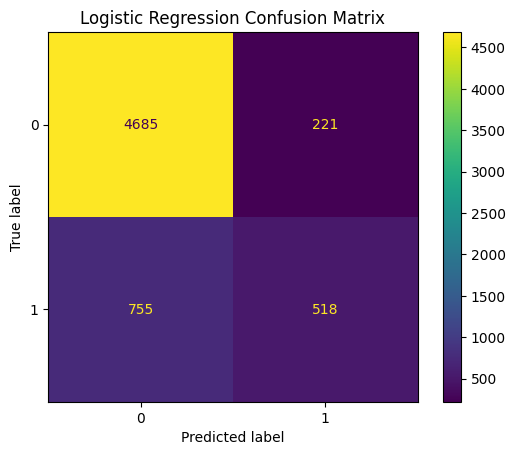

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


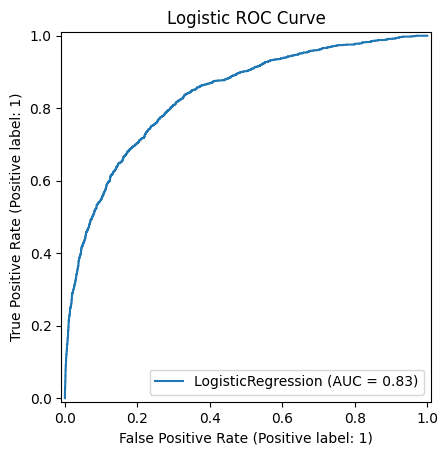

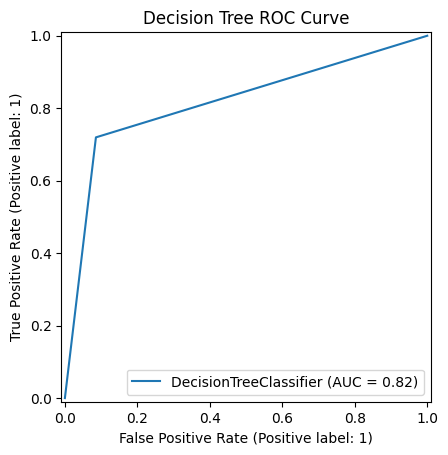

In [72]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("Logistic ROC Curve")
plt.show()

RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Decision Tree ROC Curve")
plt.show()
